
<img src="https://th.bing.com/th/id/OIP.UALyJPEFAcMOe4IIyDoQbwAAAA?w=192&h=174&c=7&r=0&o=5&dpr=1.5&pid=1.7"  alt="Unable to display picture, please check the network" style="height:90px;" align="right"/>

<!-- <img src=" https://phys100.xmu.edu.cn/2020images/gold100.png"  alt="Unable to display picture, please check the network" style="height:85px;" align="right"/> -->
<hr>
<font face="微软雅黑" size=2><p align="right">院选课 《 <i>机器学习</i> 》 第 十 次作业——翟家辉 (<i>19720212203881</i>) </p></font> 
<hr>

# 

<font face="华文行楷" size=15 ><div align='center'>随机网络和系综学习</div></font> 

    
 <font face="华文行楷" size=10 ><div align='center'>(Random network and comprehensive learning)</div></font> 

---------------------
________________________
<font size=6><div align='center'> **---------------------------目录---------------------------**</div></font>

$\quad$

<font size=5> **&#x2705; 壹 ·  随机多层感知模型**
    
$\quad$
    
<font size=5> **&#x2705; 贰 · 模型参数影响**

$\quad$
    
<font size=5> **&#x2705; 叁 · 系综学习**

$\quad$
    
<font size=5> **&#x2705; 肆 · 特征函数**


In [1]:
#常用库及命令

import numpy as np
    # 矩阵运算
import matplotlib.pyplot as plt
    # 绘图
# import ipywidgets as widgets
    # 输入控件
import matplotlib.gridspec as gridspec
    # 自定义图形布局
# import math
    # 数学运算
# import scipy as sc
    # 科学运算及其他
# import sympy as sy
    # 符号计算
# from scipy.optimize import curve_fit
    # 函数拟合
# from scipy.fft import fft,fftfreq
    # 快速FFT变换
# import numba as nb
    # CUDA加速
import time
    # 记录时间
# from scipy.integrate import odeint
    # ODE求解
# from scipy.integrate import solve_ivp
    # 变步长积分
# import matplotlib.animation as animation
    # 动画
from joblib import Parallel, delayed
    # CPU并行加速
from tqdm import tqdm
    # 进度条显示
import pandas as pd
    # 数据读取
# import taichi  
import plotly as py
    # 高级绘图
from plotly.offline import init_notebook_mode, iplot, plot
    # 同上
import plotly.graph_objs as go
    # 同上
import seaborn as sns
    # 绘图
import sklearn
    # 机器学习
import copy
    # 复制
import matplotlib as mpl

# %matplotlib notebook
    # 绘图模式
plt.rcParams['font.sans-serif'] = ['SimHei']
    # 绘图显示中文
plt.rcParams['axes.unicode_minus'] = False
    # 绘图显示负号
    


<h1>文档细目<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-1"></a></span></li><li><span><a href="#一-·-随机多层感知模型" data-toc-modified-id="一-·-随机多层感知模型-2">一 · 随机多层感知模型</a></span><ul class="toc-item"><li><span><a href="#测试数据" data-toc-modified-id="测试数据-2.1">测试数据</a></span></li><li><span><a href="#随机层" data-toc-modified-id="随机层-2.2">随机层</a></span></li></ul></li><li><span><a href="#二-·-模型参数影响" data-toc-modified-id="二-·-模型参数影响-3">二 · 模型参数影响</a></span><ul class="toc-item"><li><span><a href="#随机权重" data-toc-modified-id="随机权重-3.1">随机权重</a></span></li><li><span><a href="#模型深度" data-toc-modified-id="模型深度-3.2">模型深度</a></span></li></ul></li><li><span><a href="#三-·-系综学习" data-toc-modified-id="三-·-系综学习-4">三 · 系综学习</a></span><ul class="toc-item"><li><span><a href="#多参数" data-toc-modified-id="多参数-4.1">多参数</a></span></li><li><span><a href="#单参数" data-toc-modified-id="单参数-4.2">单参数</a></span></li></ul></li><li><span><a href="#四-·-特征函数" data-toc-modified-id="四-·-特征函数-5">四 · 特征函数</a></span></li></ul></div>

<span style="color: green;">结论</span>$\qquad$
<span style="color: blue;">引用</span>$\qquad$
<span style="color: red;">问题</span>$\qquad$
<span style="color: yellow;">再出发！</span>

<!-- <div class="alert alert-success">成功！很好地完成了提交。</div>
<div class="alert alert-info">信息！请注意这个信息。</div>
<div class="alert alert-danger">错误！请进行一些更改。</div> 
<div class="alert alert-warning">警告！请不要提交。</div>
-->

---------
--------
# 一 · 随机多层感知模型

## 测试数据

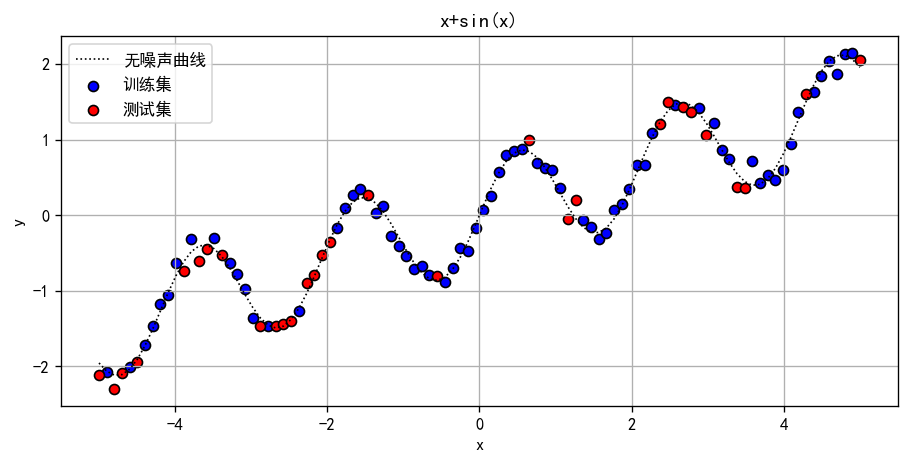

In [2]:
from sklearn.model_selection import train_test_split


# 定义函数
a = 0.3
np.random.seed(55)
m = 100
x = np.linspace(-5, 5, m).reshape(-1, 1)
y = a * x + (1 - a) * np.sin(3 * x) + 0.1 * np.random.randn(x.shape[0], x.shape[1])

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
sorted_indices = np.argsort(X_train[:, 0])
X_train = X_train[sorted_indices]
y_train = y_train[sorted_indices]

sorted_indices = np.argsort(X_test[:,0])
X_test = X_test[sorted_indices]
y_test = y_test[sorted_indices]

# 绘制图形
plt.figure(figsize=[9, 4],dpi=120)
plt.plot(x, a * x + (1 - a) * np.sin(3 * x), "k:", label="无噪声曲线",linewidth=1)  # 无噪声的曲线
plt.scatter(X_train, y_train, c="b",edgecolor="k", label="训练集")  # 黑圈表示训练集
plt.scatter(X_test, y_test, c="r",edgecolor="k", label="测试集")  # 红点表示测试集
plt.title("x+sin(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## 随机层

In [49]:
class Layer(object):
    '''
    全连接层：包括输入层和隐含层
    
    '''
    ###################################################################################################
    def __init__(self, input_dim, output_dim, activate,mu):
        self.input_dim = input_dim #输入数据维数，即该层神经元数
        self.output_dim = output_dim #输出数据维数，即下层神经元数
        self.W = np.random.normal(-mu,mu,(self.input_dim+1, self.output_dim)) # 随机初始化权重矩阵，分布 N(0,0.1)
        self.b = np.zeros((output_dim,1)) # 偏置项b初始化为 0
        self.act = activate
        
    def activate(self, z, grad=False):
        
        if self.act == 'sigmoid':
            h = 1/(1+np.exp(-z))
            if grad is True: #反向传播保留的梯度
                return h*(1-h)
            return h
        elif self.act == 'tanh':
            h = np.tanh(z)
            if grad:
                return 1-h**2
            return h
        elif self.act == 'ReLU':
            h = np.piecewise(z, [z > 0, z <= 0], [lambda x: x, lambda x: 0]) + 0  # +0为了把array(x)转成x
            if grad:
                return np.piecewise(z, [z > 0, z <= 0], [lambda x: 1, lambda x: 0]) + 0 
            return h
        elif self.act == 'linear':
            if grad:
                return z
            return z
        elif self.act == 'softmax':
            h = np.exp(z)/(np.exp(z).sum(axis=1).reshape(z.shape[0],1)) 
            return h
        
    def forward(self, input_data):
        self.input_data = input_data #输入矩阵数据
        self.b=np.insert(input_data,0,values=1,axis=1)
        self.z = np.dot(self.b , self.W) #执行前馈传播，此时self.b执行形状广播操作。
        a = self.activate(self.z) #激活函数作用
        return a


In [50]:
class RandomMLP:
    def __init__(self,hidden_dim,input_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = np.array(hidden_dim)
        self.output_dim = output_dim
        self.layers = []
    
    def initialize_layers(self,mu,Mu):
        # 随机初始化除输出层和倒数第一层隐含层之间的权重
        dim=self.input_dim
        for i in range(len(self.hidden_dim)):
#             print(dim,self.hidden_dim[i])
            layer = Layer(dim,self.hidden_dim[i], 'tanh', mu)
            dim=self.hidden_dim[i]
#             print(dim)
            self.layers.append(layer)
        self.output_layer = Layer(dim,self.output_dim, 'linear', Mu)

    
    
    def train(self, X, y):
        # 前向传播计算隐含层的输出
#         hidden_output = np.insert(X,0,values=1,axis=1)
        hidden_output = X
        for layer in self.layers:
            hidden_output = layer.forward(hidden_output)
        # 使用正规方程计算输出层和倒数第一层隐含层之间的权重

        hidden_output=np.insert(hidden_output,0,values=1,axis=1)
        xx=np.linalg.pinv(np.dot(hidden_output.T,hidden_output))
#         print(xx.shape)
#         print(self.output_layer.W.shape)
        self.output_layer.W = np.dot(np.dot(xx,hidden_output.T),y)
#         print(self.output_layer.W.shape)
        
        
    def predict(self, X):
        # 在输入数据 X 上添加偏置项
        hidden_output = X
        for layer in self.layers:
#             print(layer.input_dim,layer.output_dim,layer.W.shape,layer.b.shape)
            hidden_output = layer.forward(hidden_output)
            
        # 计算输出层的预测值
        y_pred = self.output_layer.forward(hidden_output)
        return y_pred
    
    def show(self,X,ax,n):
        hidden_output = X
        for layer in self.layers:
            hidden_output = layer.forward(hidden_output)
        ax.plot(np.tile(X,(1,n)),hidden_output)
        

In [51]:
# 创建RandomMLP实例
input_dim = X_train.shape[1]
hidden_dim = [30]
output_dim = 1
model = RandomMLP(hidden_dim,input_dim,output_dim)

# 初始化权重
model.initialize_layers(1,1)

# 训练模型
model.train(X_train, y_train)

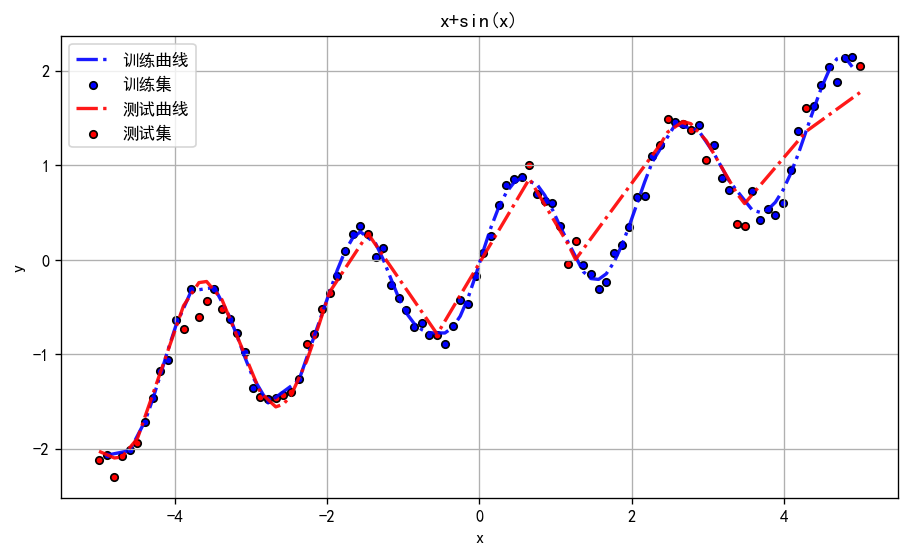

In [715]:
plt.figure(figsize=[9, 5],dpi=120)
plt.subplot(111)
plt.plot(X_train,model.predict(X_train), "b-.", label="训练曲线",linewidth=2,alpha=0.9)  # 无噪声的曲线
plt.scatter(X_train, y_train, c="b",edgecolor="k", label="训练集",s=20)  # 黑圈表示训练集
plt.title("x+sin(x)")
plt.plot(X_test,model.predict(X_test), "r-.", label="测试曲线",linewidth=2,alpha=0.9)  # 无噪声的曲线
plt.scatter(X_test, y_test, c="r",edgecolor="k", label="测试集",s=20)  # 红点表示测试集
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
# model.show(X_train,ax)
plt.show()


---------
--------
# 二 · 模型参数影响

## 随机权重

7it [00:00,  7.10it/s]


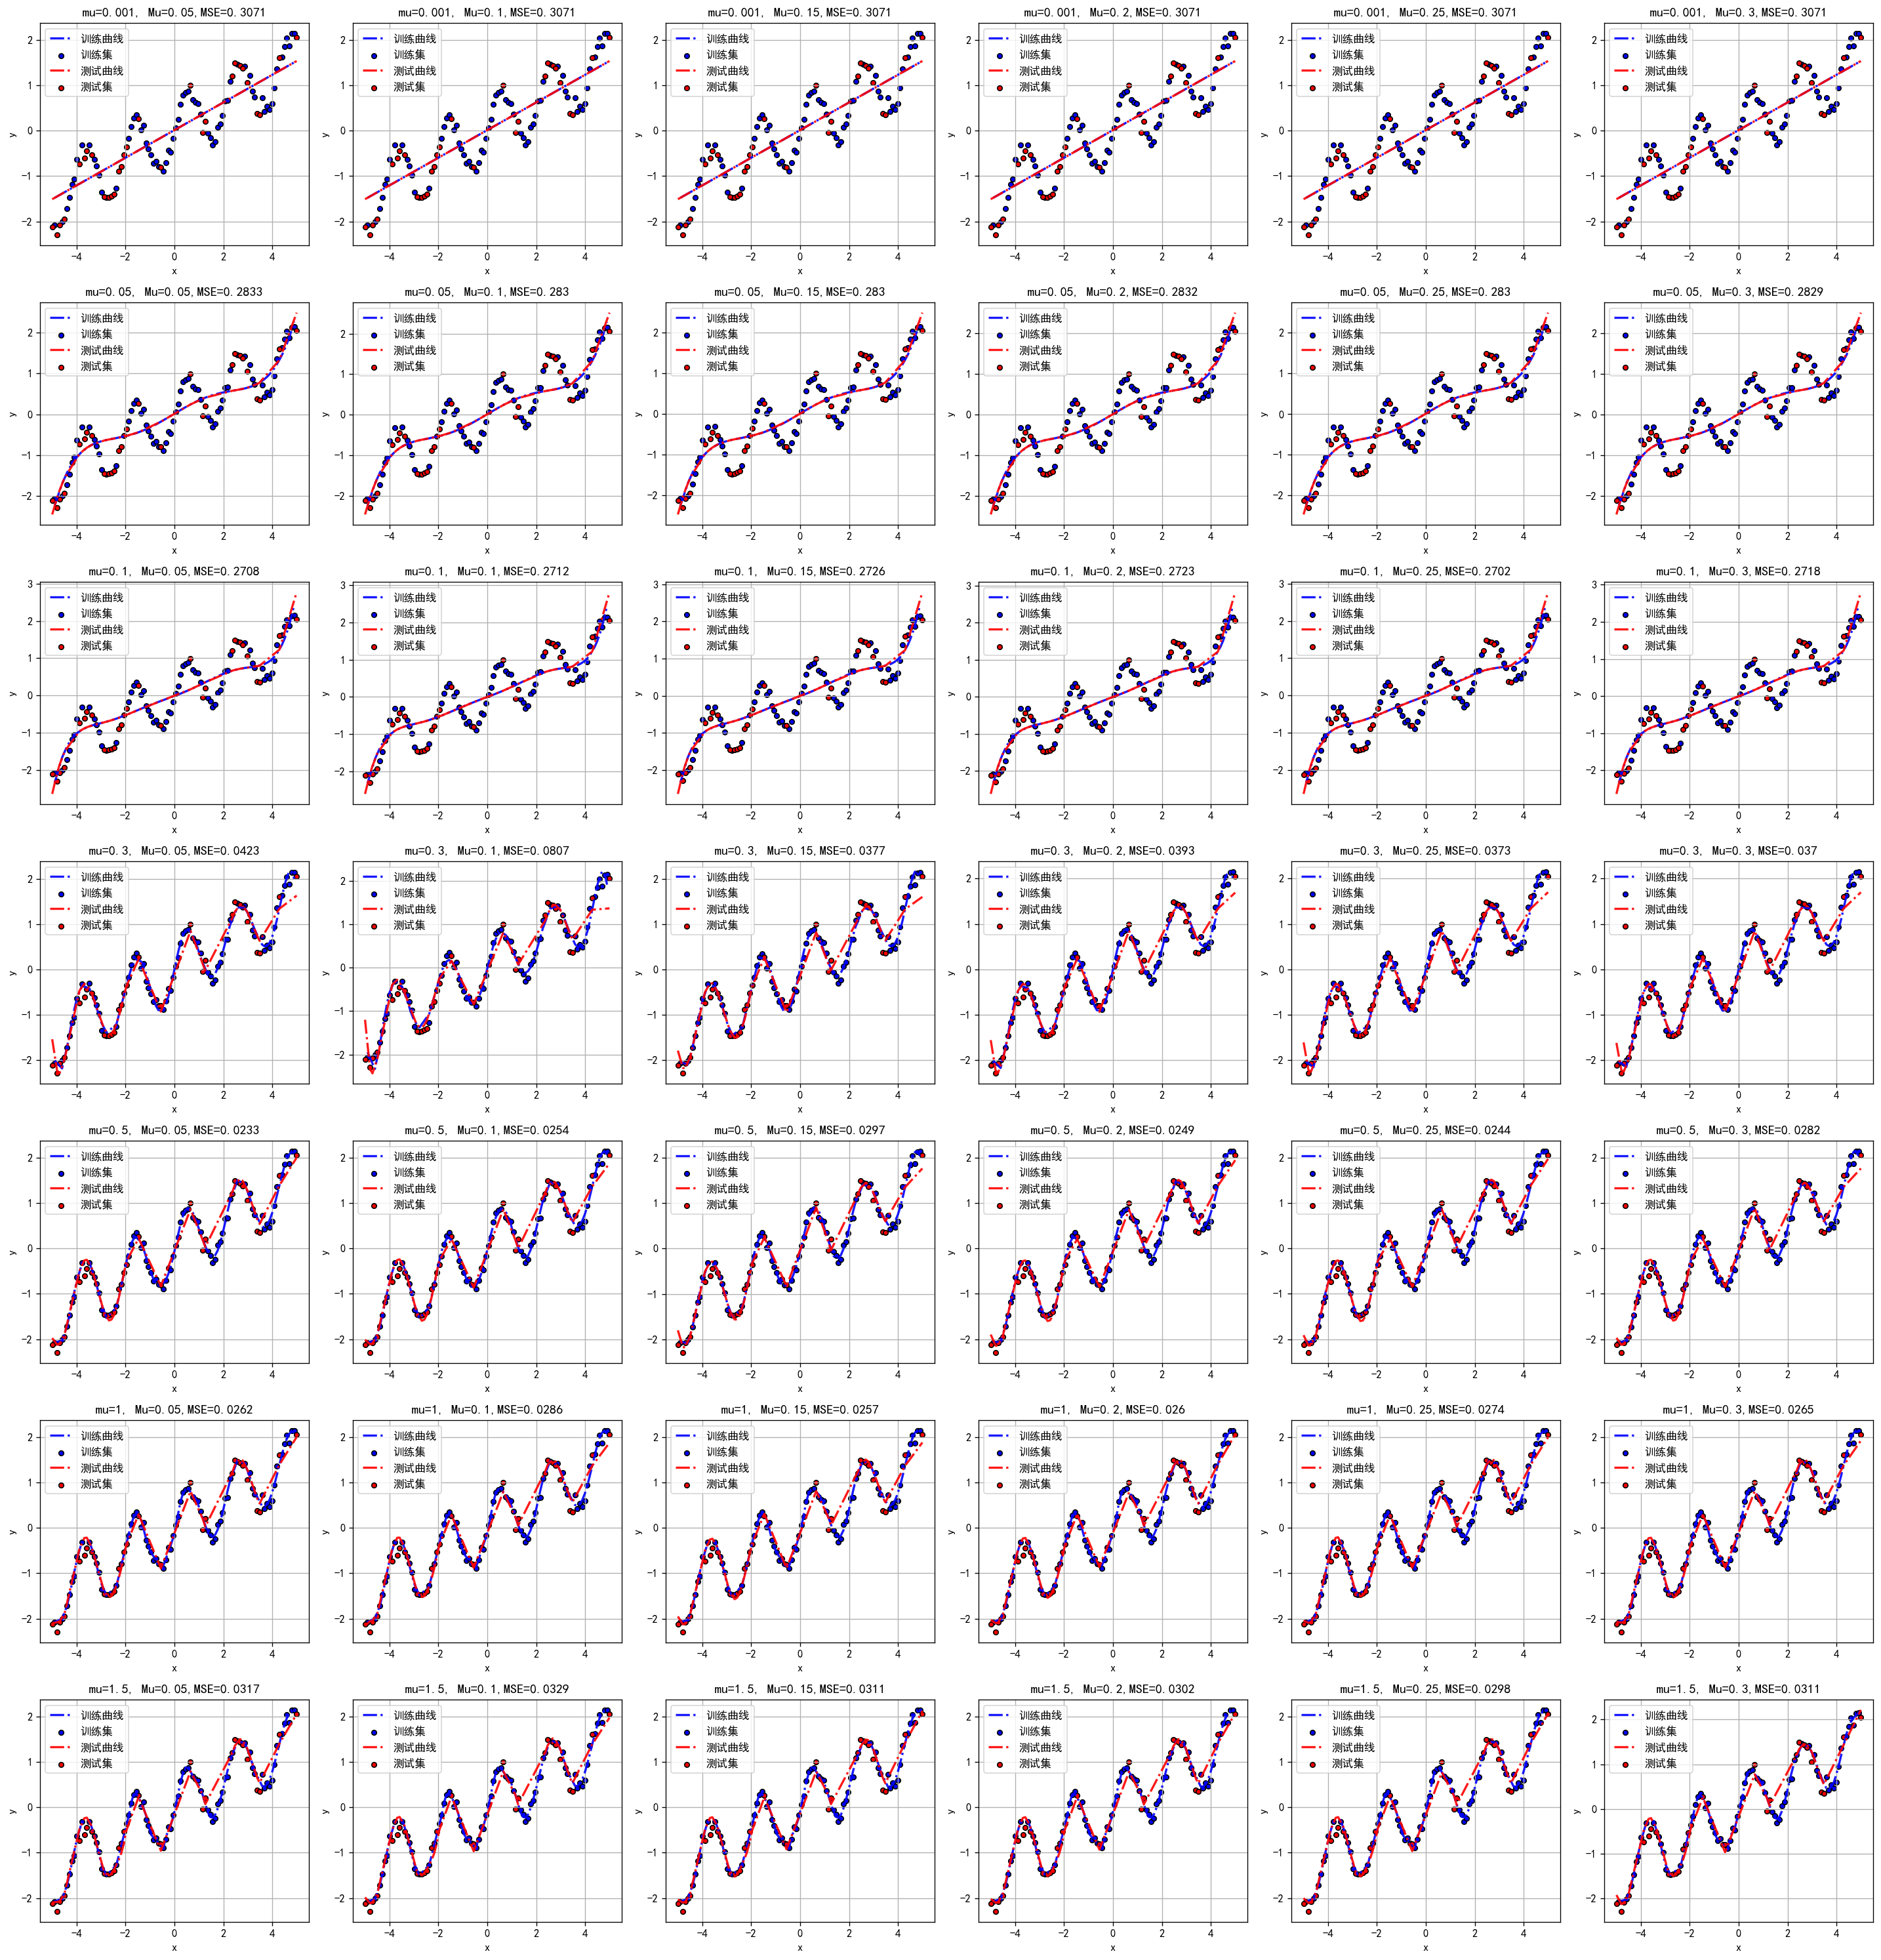

In [720]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

mu_values = [0.001,0.05,0.1,0.3,0.5,1,1.5]  # 不同的mu值
Mu_values = [0.05, 0.1, 0.15,0.2,0.25,0.30]  # 不同的Mu值

fig, axes = plt.subplots(nrows=7, ncols=6, figsize=(24, 25), dpi=120)

for i, mu in tqdm(enumerate(mu_values)):
    for j, Mu in enumerate(Mu_values):
        # 创建RandomMLP实例
        np.random.seed()
        input_dim = X_train.shape[1]
        hidden_dim = [100]
        output_dim = 1
        model = RandomMLP(hidden_dim, input_dim, output_dim)

        # 初始化权重
        model.initialize_layers(mu, Mu)

        # 训练模型
        model.train(X_train, y_train)

        # 绘制训练集曲线和点
        axes[i, j].plot(X_train, model.predict(X_train), "b-.", label="训练曲线", linewidth=2, alpha=0.9)
        axes[i, j].scatter(X_train, y_train, c="b", edgecolor="k", label="训练集", s=20)

        # 绘制测试集曲线和点
        axes[i, j].plot(X_test, model.predict(X_test), "r-.", label="测试曲线", linewidth=2, alpha=0.9)
        axes[i, j].scatter(X_test, y_test, c="r", edgecolor="k", label="测试集", s=20)

        mse = mean_squared_error(y_test, model.predict(X_test))
        axes[i, j].set_title(f"mu={mu}, Mu={Mu},MSE={round(mse,4)}")

        axes[i, j].set_xlabel("x")
        axes[i, j].set_ylabel("y")
        axes[i, j].legend()
        axes[i, j].grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-success">随机权重的范围过低欠拟合,随机权重的范围过高过拟合,最后一层参数与拟合结果无关</div>

## 模型深度

4it [00:00,  9.79it/s]


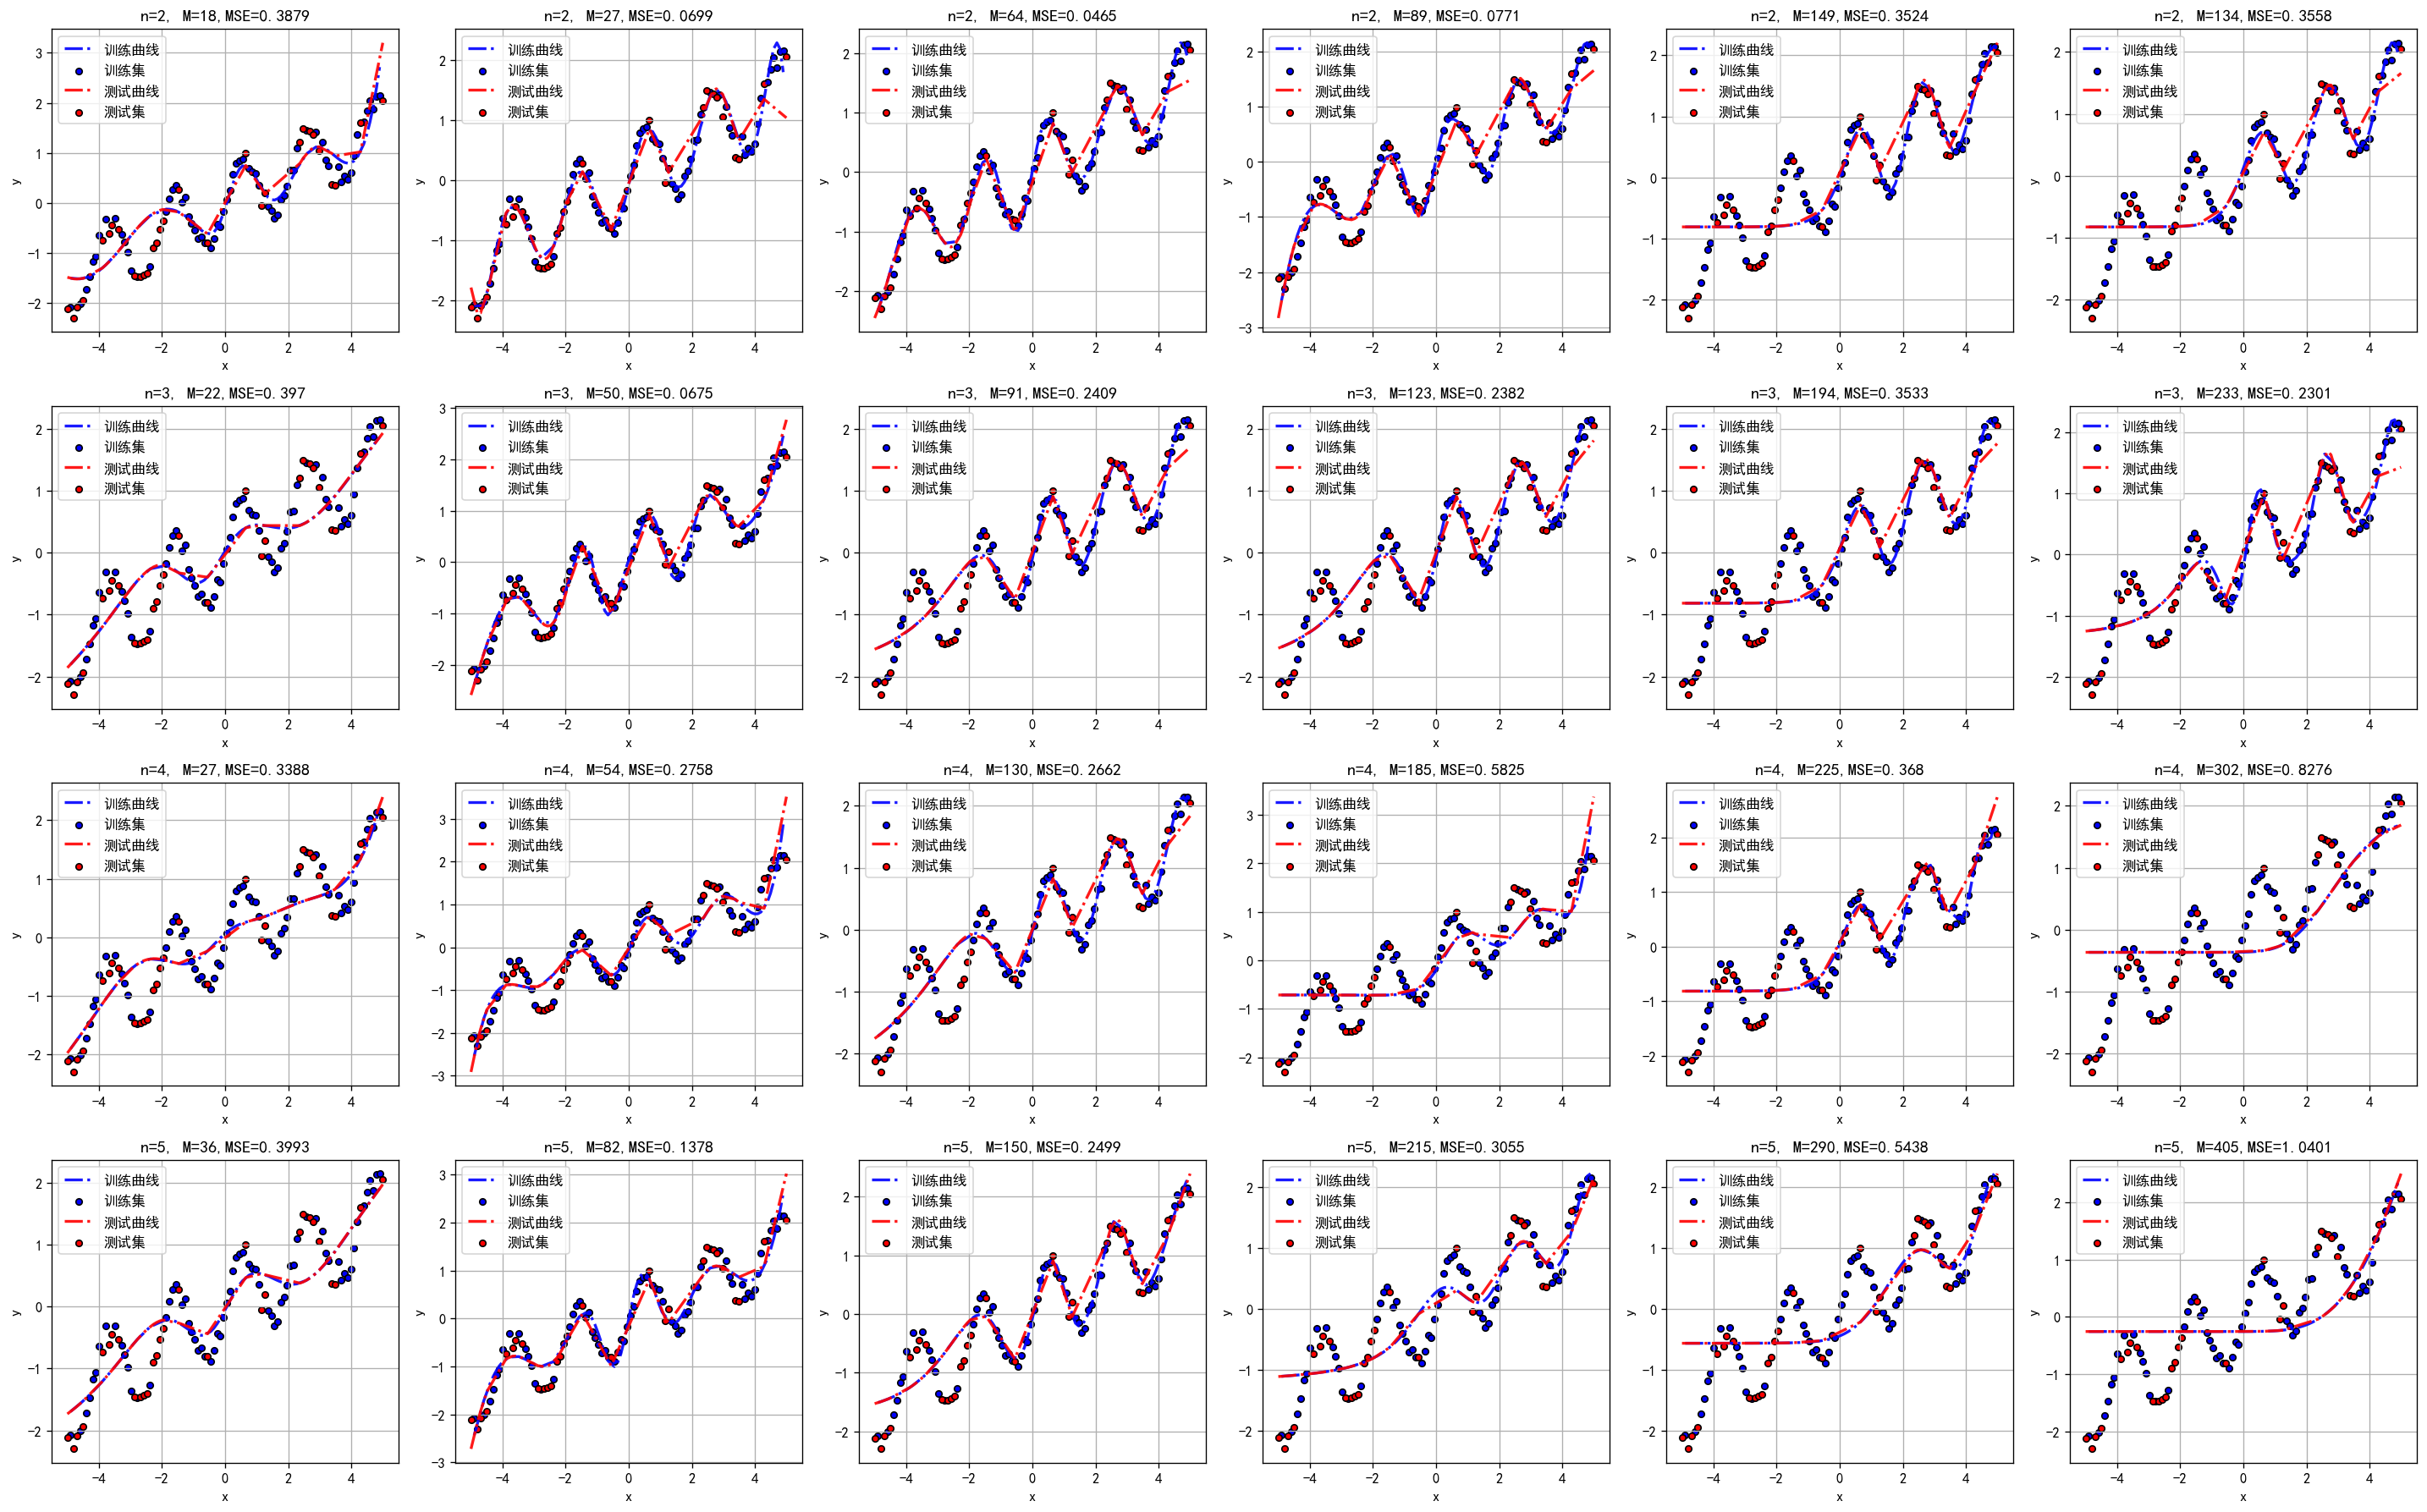

In [721]:
n_values = [2,3,4,5] 
m_values = [10,20,40,60,80,100]  

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(24, 15), dpi=120)

for i, n in tqdm(enumerate(n_values)):
    for j, m in enumerate(m_values):
        # 创建RandomMLP实例
        input_dim = X_train.shape[1]
        hidden_dim = np.random.randint(m/2,m,size=(n))
        output_dim = 1
        model = RandomMLP(hidden_dim, input_dim, output_dim)

        # 初始化权重
        mu=0.5
        Mu=0.2
        model.initialize_layers(mu, Mu)

        # 训练模型
        model.train(X_train, y_train)

        # 绘制训练集曲线和点
        axes[i, j].plot(X_train, model.predict(X_train), "b-.", label="训练曲线", linewidth=2, alpha=0.9)
        axes[i, j].scatter(X_train, y_train, c="b", edgecolor="k", label="训练集", s=20)

        # 绘制测试集曲线和点
        axes[i, j].plot(X_test, model.predict(X_test), "r-.", label="测试曲线", linewidth=2, alpha=0.9)
        axes[i, j].scatter(X_test, y_test, c="r", edgecolor="k", label="测试集", s=20)

        mse = mean_squared_error(y_test, model.predict(X_test))
        axes[i, j].set_title(f"n={n}, M={sum(hidden_dim)},MSE={round(mse,4)}")

        axes[i, j].set_xlabel("x")
        axes[i, j].set_ylabel("y")
        axes[i, j].legend()
        axes[i, j].grid(True)

plt.tight_layout()
plt.show()

<div class="alert alert-success">模型深度增加,拟合效果下降</div>

---------
--------
# 三 · 系综学习

## 多参数

In [5]:
n_values = [1,2,3] 
m_values = [60,80,100,200]  
mu_values = [0.001,0.05,0.1,0.3,0.5,1,1.5] 
Mu_values = [0.05, 0.1, 0.15,0.2,0.25,0.30]

In [6]:
def Comprehensive(n,m,mu,Mu):
    global X_train, X_test, y_train, y_test,xn
    input_dim = X_train.shape[1]
    
    hidden_dim = np.random.randint(m/2,m,size=(n))
    output_dim = 1
    model = RandomMLP(hidden_dim,input_dim,output_dim)

    # 初始化权重
    model.initialize_layers(mu,Mu)

    # 训练模型
    model.train(X_train, y_train)
#     xn=np.linspace(-8,8,1000).reshape(-1, 1)
    
    perd_train=model.predict(X_train)
    perd_test=model.predict(X_test)
    xn_test=model.predict(xn)
    return np.array(perd_train),np.array(perd_test),np.array(xn_test)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.98it/s]


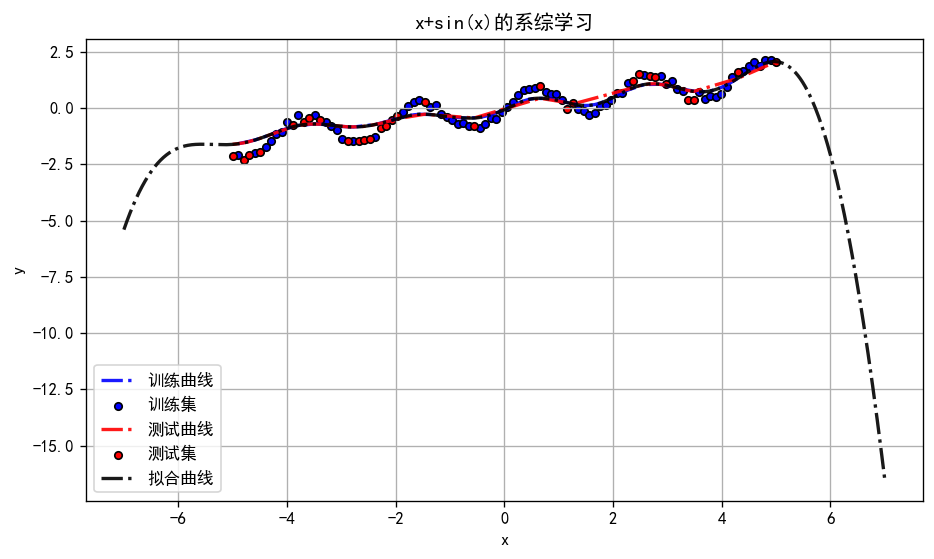

In [8]:
predict_train=np.zeros_like(y_train)
predict_test=np.zeros_like(y_test)
xn=np.linspace(-7,7,1000).reshape(-1, 1)
predict=np.zeros_like(xn)
N=1000
for i in tqdm(range(N)):
    np.random.seed()
    n=np.random.choice(n_values)
    m=np.random.choice(m_values)
    mu=np.random.choice(mu_values)
    Mu=np.random.choice(Mu_values)
    ptrain,ptest,p=Comprehensive(n,m,mu,Mu)
    predict_train=predict_train+ptrain
    predict_test=predict_test+ptest
    predict=p+predict
# print(predict_train)
    
plt.figure(figsize=[9, 5],dpi=120)
plt.subplot(111)
plt.plot(X_train,predict_train/N, "b-.", label="训练曲线",linewidth=2,alpha=0.9)  # 无噪声的曲线
plt.scatter(X_train, y_train, c="b",edgecolor="k", label="训练集",s=20)  # 黑圈表示训练集
plt.title("x+sin(x)的系综学习")
plt.plot(X_test,predict_test/N, "r-.", label="测试曲线",linewidth=2,alpha=0.9)  # 无噪声的曲线
plt.scatter(X_test, y_test, c="r",edgecolor="k", label="测试集",s=20)  # 红点表示测试集
plt.plot(xn,predict/N, "k-.", label="拟合曲线",linewidth=2,alpha=0.9)  # 无噪声的曲线
# mse = mean_squared_error(y_test, model.predict(X_test))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

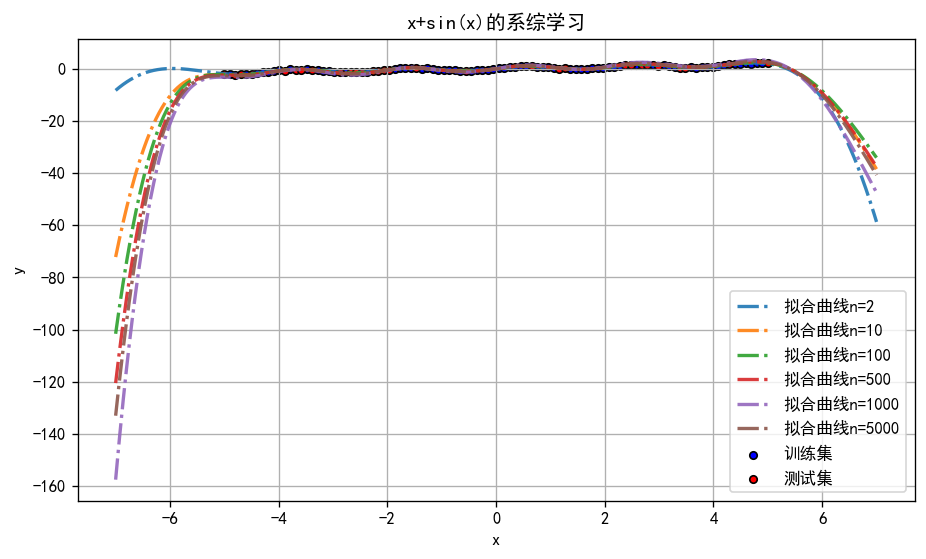

In [759]:
predict_train=np.zeros_like(y_train)
predict_test=np.zeros_like(y_test)
xn=np.linspace(-7,7,1000).reshape(-1, 1)
predict=np.zeros_like(xn)
plt.figure(figsize=[9, 5],dpi=120)
for N in[2,10,100,500,1000,5000]:
    for i in range(N):
        n=np.random.choice(n_values)
        m=np.random.choice(m_values)
        mu=np.random.choice(mu_values)
        Mu=np.random.choice(Mu_values)
        ptrain,ptest,p=Comprehensive(n,m,mu,Mu)
        predict_train=predict_train+ptrain
        predict_test=predict_test+ptest
        predict=p+predict
    plt.plot(xn,predict/N, "-.", label=f"拟合曲线n={N}",linewidth=2,alpha=0.9)  # 无噪声的曲线
    
# print(predict_train)
plt.scatter(X_train, y_train, c="b",edgecolor="k", label="训练集",s=20)  # 黑圈表示训练集
plt.title("x+sin(x)的系综学习")
plt.scatter(X_test, y_test, c="r",edgecolor="k", label="测试集",s=20)  # 红点表示测试集
# mse = mean_squared_error(y_test, model.predict(X_test))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-success">系综学习外推结果会随着系统数增大而衰减,即对新信息输入预测能力下降</div>

## 单参数

In [85]:
n_values = [1] 
m_values = [20,20]  
mu_values = [1]
Mu_values = [0.1]

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:08<00:00, 589.64it/s]


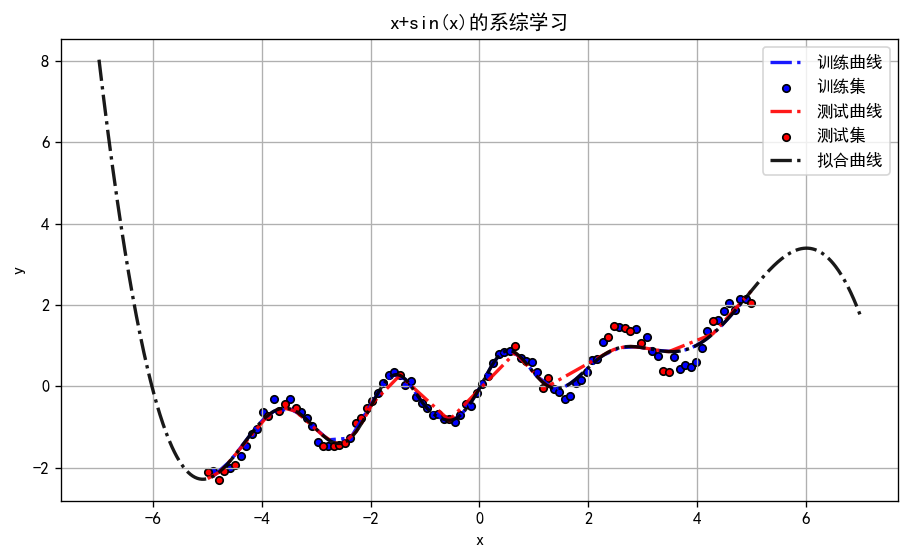

In [87]:
predict_train=np.zeros_like(y_train)
predict_test=np.zeros_like(y_test)
xn=np.linspace(-7,7,1000).reshape(-1, 1)
predict=np.zeros_like(xn)
N=5000
for i in tqdm(range(N)):
    np.random.seed()
    n=np.random.choice(n_values)
    m=np.random.choice(m_values)
    mu=np.random.choice(mu_values)
    Mu=np.random.choice(Mu_values)
    ptrain,ptest,p=Comprehensive(n,m,mu,Mu)
    predict_train=predict_train+ptrain
    predict_test=predict_test+ptest
    predict=p+predict
# print(predict_train)
    
plt.figure(figsize=[9, 5],dpi=120)
plt.subplot(111)
plt.plot(X_train,predict_train/N, "b-.", label="训练曲线",linewidth=2,alpha=0.9)  # 无噪声的曲线
plt.scatter(X_train, y_train, c="b",edgecolor="k", label="训练集",s=20)  # 黑圈表示训练集
plt.title("x+sin(x)的系综学习")
plt.plot(X_test,predict_test/N, "r-.", label="测试曲线",linewidth=2,alpha=0.9)  # 无噪声的曲线
plt.scatter(X_test, y_test, c="r",edgecolor="k", label="测试集",s=20)  # 红点表示测试集
plt.plot(xn,predict/N, "k-.", label="拟合曲线",linewidth=2,alpha=0.9)  # 无噪声的曲线

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

---------
--------
# 四 · 特征函数

In [100]:
# 创建RandomMLP实例
input_dim = X_train.shape[1]
hidden_dim = [20,20,20,20,20,5]
output_dim = 1
model = RandomMLP(hidden_dim,input_dim,output_dim)

# 初始化权重
model.initialize_layers(0.1,0.5)

# 训练模型
model.train(X_train, y_train)

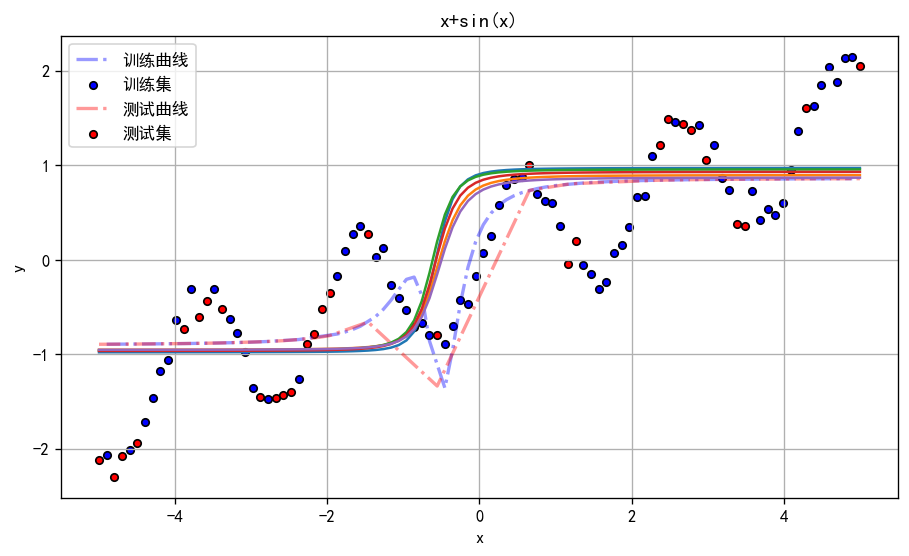

In [101]:
plt.figure(figsize=[9, 5],dpi=120)
ax=plt.subplot(111)
plt.plot(X_train,model.predict(X_train), "b-.", label="训练曲线",linewidth=2,alpha=0.4)  # 无噪声的曲线
plt.scatter(X_train, y_train, c="b",edgecolor="k", label="训练集",s=20)  # 黑圈表示训练集
plt.title("x+sin(x)")
plt.plot(X_test,model.predict(X_test), "r-.", label="测试曲线",linewidth=2,alpha=0.4)  # 无噪声的曲线
plt.scatter(X_test, y_test, c="r",edgecolor="k", label="测试集",s=20)  # 红点表示测试集
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
model.show(x,ax,hidden_dim[-1])
plt.show()